In [1]:
# !pip install py7zr
# !pip install tensorflow==2.15.0

# Download Dataset

In [2]:
import gdown
import os
import py7zr

# Link from GitHub
google_drive_link = 'https://drive.google.com/file/d/1pEnxoKSt1rNeODmdsMMTTspKLL8vNqEM/view?usp=drive_link'

# Extract the file ID from the link
file_id = google_drive_link.split('/')[-2]

# Create the direct download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Define the output file path for the downloaded file
output_path = '/content/downloaded_file.7z'  # Change the extension to .7z

# Download the file
gdown.download(download_url, output_path, quiet=False)

# Verify the download
if os.path.exists(output_path):
    print("File downloaded successfully.")

    # Un7z the file
    with py7zr.SevenZipFile(output_path, mode='r') as archive:
        archive.extractall('/content/dataset_fix')  # Extract to the specified directory
    print("File extracted successfully.")
else:
    print("Failed to download the file.")


Downloading...
From (original): https://drive.google.com/uc?id=1pEnxoKSt1rNeODmdsMMTTspKLL8vNqEM
From (redirected): https://drive.google.com/uc?id=1pEnxoKSt1rNeODmdsMMTTspKLL8vNqEM&confirm=t&uuid=c59f6821-8868-4c1e-a982-0396cea5c069
To: /content/downloaded_file.7z
100%|██████████| 1.02G/1.02G [00:08<00:00, 117MB/s]


File downloaded successfully.
File extracted successfully.


In [3]:
import os

def print_image_counts(data_dir):
    # Directories for Train, Val, and Test
    datasets = ['Train', 'Val', 'Test']

    for dataset in datasets:
        dataset_path = os.path.join(data_dir, dataset)

        print(f"Image counts for {dataset} dataset:")

        # Iterate through each class folder
        for class_name in os.listdir(dataset_path):
            class_path = os.path.join(dataset_path, class_name)
            if os.path.isdir(class_path):  # Check if it's a directory
                image_count = len(os.listdir(class_path))
                print(f"  {class_name}: {image_count} images")

        print()  # Print a newline for better readability

# Usage
print_image_counts('/content/dataset_fix/plant-village-fix-updated')


Image counts for Train dataset:
  pepper_healthy: 1988 images
  strawberry_healthy: 1824 images
  grape_healthy: 1692 images
  tomato_late-blight: 1851 images
  strawberry_leaf-scorch: 1774 images
  tomato_early-blight: 1920 images
  cherry_powdery-mildew: 1683 images
  potato_healthy: 1824 images
  corn_cercospora-leaf-spot: 1642 images
  tomato_yellow-leaf-curl-virus: 1961 images
  pepper_bacterial-spot: 1913 images
  corn_common-rust: 1907 images
  potato_early-blight: 1939 images
  apple_cedar-apple-rust: 1760 images
  tomato_bacterial-spot: 1702 images
  tomato_healthy: 1926 images
  corn_healthy: 1859 images
  peach_bacterial-spot: 1838 images
  cherry_healthy: 1826 images
  potato_late-blight: 1939 images
  grape_leaf-blight: 1722 images
  grape_esca: 1920 images
  peach_healthy: 1728 images
  corn_northern-leaf-blight: 1908 images
  grape_black-rot: 1888 images
  apple_healthy: 2008 images
  tomato_septoria-leaf-spot: 1746 images
  apple_black-rot: 1987 images
  apple_scab: 201

In [4]:
import os
import shutil
import random

def adjust_image_counts(data_dir):
    # Directories for Train, Val, and Test
    datasets = ['Train', 'Val', 'Test']

    # Target counts
    target_train_count = 1000
    target_val_count = 200

    for dataset in datasets:
        dataset_path = os.path.join(data_dir, dataset)

        if dataset == 'Train':
            target_count = target_train_count
        elif dataset == 'Val':
            target_count = target_val_count
        else:
            continue  # Skip Test dataset adjustments

        print(f"Adjusting image counts for {dataset} dataset:")

        # Iterate through each class folder
        for class_name in os.listdir(dataset_path):
            class_path = os.path.join(dataset_path, class_name)
            if os.path.isdir(class_path):  # Check if it's a directory
                images = os.listdir(class_path)
                current_count = len(images)

                if current_count > target_count:
                    # Randomly select images to keep
                    images_to_keep = random.sample(images, target_count)
                    images_to_remove = set(images) - set(images_to_keep)

                    # Remove excess images
                    for image in images_to_remove:
                        os.remove(os.path.join(class_path, image))

                    print(f"  {class_name}: Reduced from {current_count} to {target_count} images")

                elif current_count < target_count:
                    # Copy images to meet the target count
                    for _ in range(target_count - current_count):
                        # Randomly choose an image to copy
                        image_to_copy = random.choice(images)
                        new_image_name = f"copy_{_}_{image_to_copy}"  # Avoid overwriting
                        shutil.copy(os.path.join(class_path, image_to_copy),
                                    os.path.join(class_path, new_image_name))
                    print(f"  {class_name}: Increased from {current_count} to {target_count} images")

                else:
                    print(f"  {class_name}: Already has {current_count} images")

        print()  # Print a newline for better readability

# Usage
adjust_image_counts('/content/dataset_fix/plant-village-fix-updated')


Adjusting image counts for Train dataset:
  pepper_healthy: Reduced from 1988 to 1000 images
  strawberry_healthy: Reduced from 1824 to 1000 images
  grape_healthy: Reduced from 1692 to 1000 images
  tomato_late-blight: Reduced from 1851 to 1000 images
  strawberry_leaf-scorch: Reduced from 1774 to 1000 images
  tomato_early-blight: Reduced from 1920 to 1000 images
  cherry_powdery-mildew: Reduced from 1683 to 1000 images
  potato_healthy: Reduced from 1824 to 1000 images
  corn_cercospora-leaf-spot: Reduced from 1642 to 1000 images
  tomato_yellow-leaf-curl-virus: Reduced from 1961 to 1000 images
  pepper_bacterial-spot: Reduced from 1913 to 1000 images
  corn_common-rust: Reduced from 1907 to 1000 images
  potato_early-blight: Reduced from 1939 to 1000 images
  apple_cedar-apple-rust: Reduced from 1760 to 1000 images
  tomato_bacterial-spot: Reduced from 1702 to 1000 images
  tomato_healthy: Reduced from 1926 to 1000 images
  corn_healthy: Reduced from 1859 to 1000 images
  peach_bac

## Delete some ipynb checkpoint

In [5]:
import os
import shutil

# Define the root directory path
root_directory = '/content/dataset_fix'

# Walk through the directory
for root, dirs, files in os.walk(root_directory):
    for dir_name in dirs:
        if dir_name == '.ipynb_checkpoints':
            # Construct the full path to the .ipynb_checkpoints directory
            dir_path = os.path.join(root, dir_name)
            # Delete the directory
            shutil.rmtree(dir_path)
            print(f'Deleted: {dir_path}')


Deleted: /content/dataset_fix/plant-village-fix-updated/Train/tomato_septoria-leaf-spot/.ipynb_checkpoints
Deleted: /content/dataset_fix/plant-village-fix-updated/Test/corn_cercospora-leaf-spot/.ipynb_checkpoints


# Import Library

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import tensorflow_hub as hub
import time

# Preproccesing data

## Create the label list and train dataset

In [7]:
import os

class Dataset:
    # Class variable to store folder names
    class_names = []

    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.load_class_names()

    def load_class_names(self):
        # Path to the Train directory
        train_dir = os.path.join(self.data_dir, 'Train')

        # List folder names inside the Train directory
        if os.path.exists(train_dir):
            self.class_names = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]
        else:
            print(f"The directory {train_dir} does not exist.")

# Usage
data_directory = '/content/dataset_fix/plant-village-fix-updated'  # Change this to your actual path
dataset = Dataset(data_directory)
disease_types = dataset.class_names
print("Class names:", disease_types)


Class names: ['pepper_healthy', 'strawberry_healthy', 'grape_healthy', 'tomato_late-blight', 'strawberry_leaf-scorch', 'tomato_early-blight', 'cherry_powdery-mildew', 'potato_healthy', 'corn_cercospora-leaf-spot', 'tomato_yellow-leaf-curl-virus', 'pepper_bacterial-spot', 'corn_common-rust', 'potato_early-blight', 'apple_cedar-apple-rust', 'tomato_bacterial-spot', 'tomato_healthy', 'corn_healthy', 'peach_bacterial-spot', 'cherry_healthy', 'potato_late-blight', 'grape_leaf-blight', 'grape_esca', 'peach_healthy', 'corn_northern-leaf-blight', 'grape_black-rot', 'apple_healthy', 'tomato_septoria-leaf-spot', 'apple_black-rot', 'apple_scab']


In [8]:
data_dir = '/content/dataset_fix/plant-village-fix-updated'
train_dir = os.path.join(data_dir + "/Train")
val_dir = os.path.join(data_dir + "/Val")
test_dir = os.path.join(data_dir + "/Test")

## looking for head of train dataset

In [9]:
train_data = []
for diseases, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), diseases, sp])

train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.head(5)

,File,DiseaseID,Disease Type
0,pepper_healthy/4a014d71-25aa-47f4-b7cf-37dfd77...,0,pepper_healthy
1,pepper_healthy/3a7cac14-10d7-4e76-b737-c2d77e0...,0,pepper_healthy
2,pepper_healthy/4a4e1da0-7772-4dbd-8a7a-c2db432...,0,pepper_healthy
3,pepper_healthy/ba684f19-7ec6-428f-88f9-f6818bd...,0,pepper_healthy
4,pepper_healthy/639dec07-c685-42bd-8be0-f4c31ee...,0,pepper_healthy


In [10]:
val_data = []
for diseases, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(val_dir, sp)):
        val_data.append(['{}/{}'.format(sp, file), diseases, sp])

val = pd.DataFrame(val_data, columns=['File', 'DiseaseID','Disease Type'])
val.head(5)

,File,DiseaseID,Disease Type
0,pepper_healthy/4ebbed7f-321d-45e8-839e-b1af564...,0,pepper_healthy
1,pepper_healthy/0ba474dd-0cfd-4fd2-a58c-8e3d18d...,0,pepper_healthy
2,pepper_healthy/3e2945ba-7e94-4faa-9877-5133350...,0,pepper_healthy
3,pepper_healthy/985f0d8c-db2c-470c-87a2-5d923bc...,0,pepper_healthy
4,pepper_healthy/3355f3b6-7d93-4409-9e6f-6344b66...,0,pepper_healthy


In [11]:
test_data = []
for diseases, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(test_dir, sp)):
        test_data.append(['{}/{}'.format(sp, file), diseases, sp])

test = pd.DataFrame(test_data, columns=['File', 'DiseaseID','Disease Type'])
test.head(5)

,File,DiseaseID,Disease Type
0,pepper_healthy/8e6e9efb-4150-491b-a60e-bee4024...,0,pepper_healthy
1,pepper_healthy/f7b9603d-96a2-4689-b86b-a1e1a53...,0,pepper_healthy
2,pepper_healthy/9bdb797d-83c7-4b43-a148-745885d...,0,pepper_healthy
3,pepper_healthy/cddaf3ef-06ec-40ac-b3d1-cd7e0c9...,0,pepper_healthy
4,pepper_healthy/3949ee17-d163-4713-bcaa-523e87c...,0,pepper_healthy


In [12]:
list_kelas = train[['DiseaseID', 'Disease Type']].drop_duplicates()

# Urutkan DataFrame list_kelas berdasarkan DiseaseID
list_kelas = list_kelas.sort_values(by='DiseaseID').reset_index(drop=True)

# Tampilkan list_kelas
list_kelas.head

<bound method NDFrame.head of     DiseaseID                   Disease Type
0           0                 pepper_healthy
1           1             strawberry_healthy
2           2                  grape_healthy
3           3             tomato_late-blight
4           4         strawberry_leaf-scorch
5           5            tomato_early-blight
6           6          cherry_powdery-mildew
7           7                 potato_healthy
8           8      corn_cercospora-leaf-spot
9           9  tomato_yellow-leaf-curl-virus
10         10          pepper_bacterial-spot
11         11               corn_common-rust
12         12            potato_early-blight
13         13         apple_cedar-apple-rust
14         14          tomato_bacterial-spot
15         15                 tomato_healthy
16         16                   corn_healthy
17         17           peach_bacterial-spot
18         18                 cherry_healthy
19         19             potato_late-blight
20         20              grape_leaf-blight
21         21                     grape_esca
22         22                  peach_healthy
23         23      corn_northern-leaf-blight
24         24                grape_black-rot
25         25                  apple_healthy
26         26      tomato_septoria-leaf-spot
27         27                apple_black-rot
28         28                     apple_scab>

## Randomizing the Training Sample

In [13]:
seed = 45
train = train.sample(frac=1, random_state = seed)
train_index = np.arange(len(train)) #to reset the indices
train.head()

,File,DiseaseID,Disease Type
16833,corn_healthy/b4b60243-de84-444a-973f-f2ce19152...,16,corn_healthy
18957,cherry_healthy/ea04086e-125c-4836-b890-06d4c9a...,18,cherry_healthy
28289,apple_scab/f18c0441-917e-4f34-b26e-a1a71d0adec...,28,apple_scab
28197,apple_scab/c4a3c215-aa1e-4d1c-b545-1ab2b15812f...,28,apple_scab
20718,grape_leaf-blight/72e28260-7f19-43cb-9972-6f4d...,20,grape_leaf-blight


**Let's create Helper functions for visualizing diseases**

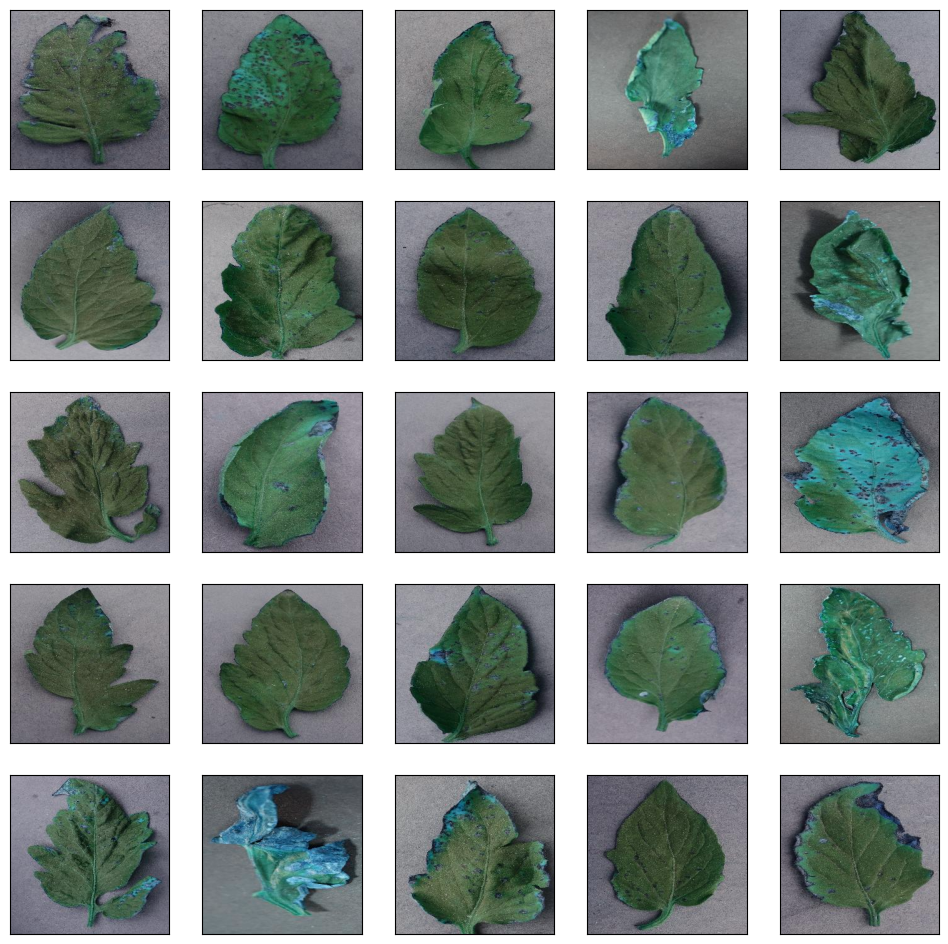

In [14]:
def disease_type(disease_type, rows, cols):
    fig,ax = plt.subplots(rows, cols, figsize=(12,12))
    disease_type = train['File'][train['Disease Type'] == disease_type].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(train_dir, disease_type[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
disease_type('tomato_bacterial-spot', 5, 5)

**Let's look at some healthy samples**

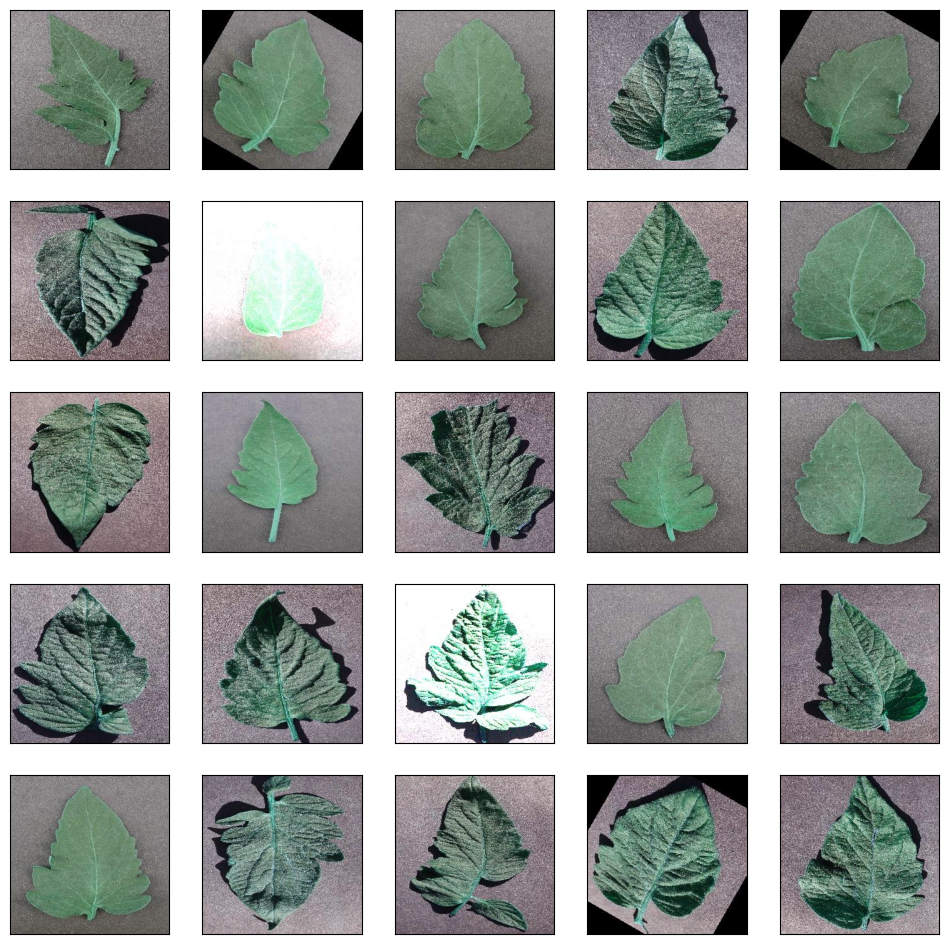

In [15]:
disease_type('tomato_healthy', 5, 5)

## Image Data Augmentation

In [16]:
import tensorflow as tf

def create_image_data_generators(data_dir, image_size, batch_size, do_data_augmentation):
    # Rescale the images
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    # Validation generator
    validation_generator = datagen.flow_from_directory(
        val_dir,  # Point to the Val directory
        shuffle=False,
        seed=42,
        color_mode="rgb",
        class_mode="categorical",
        target_size=image_size,
        batch_size=batch_size)

    if do_data_augmentation:
        # Enable data augmentation
        train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            horizontal_flip=True,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            fill_mode='nearest')
    else:
        # Disable data augmentation
        train_datagen = datagen

    # Train generator
    train_generator = train_datagen.flow_from_directory(
        train_dir,  # Point to the Train directory
        shuffle=True,
        seed=42,
        color_mode="rgb",
        class_mode="categorical",
        target_size=image_size,
        batch_size=batch_size)

    # Test generator
    test_generator = datagen.flow_from_directory(
        test_dir,  # Point to the Test directory
        shuffle=False,
        seed=42,
        color_mode="rgb",
        class_mode="categorical",
        target_size=image_size,
        batch_size=batch_size)

    return train_generator, validation_generator, test_generator


In [17]:
data_dir = data_dir
train_dir = train_dir
IMAGE_SIZE = (299, 299)
BATCH_SIZE = 32
do_data_augmentation = True
train_generator, validation_generator, test_generator = create_image_data_generators(data_dir, IMAGE_SIZE, BATCH_SIZE, do_data_augmentation)

Found 5800 images belonging to 29 classes.
Found 28999 images belonging to 29 classes.
Found 1354 images belonging to 29 classes.


# Build Model

## Create Callbacks for easy maintenance while training

In [18]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # training accuracy threshold for lr adjustment based on validation loss
        self.factor = factor # factor to reduce the learning rate
        self.batches = batches # number of training batches per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate
        self.highest_tracc = 0.0 # initial highest training accuracy
        self.lowest_vloss = np.inf # initial lowest validation loss
        self.best_weights = self.model.get_weights() # store initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights for restoration if needed

    def on_train_begin(self, logs=None):
        print('Do you want the model to ask you to halt the training [y/n]?')
        ans = input('').strip().lower()
        self.ask_permission = 1 if ans == 'y' else 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format(
            'Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        print(f'Training elapsed time: {hours:.0f} hours, {minutes:.0f} minutes, {seconds:.2f} seconds')
        self.model.set_weights(self.best_weights)  # restore best weights

    def on_train_batch_end(self, batch, logs=None):
        # Limit printing to every 10 batches or any other interval
        if batch % 10 == 0:
            acc = logs.get('accuracy') * 100
            loss = logs.get('loss')
            print(f'Processing batch {batch} of {self.batches} - Accuracy: {acc:.3f}% - Loss: {loss:.5f}', '\r', end='')

    def on_epoch_begin(self, epoch, logs=None):
        self.ep_start = time.time()

    def on_epoch_end(self, epoch, logs=None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))  # current learning rate
        acc = logs.get('accuracy')  # training accuracy
        v_acc = logs.get('val_accuracy')  # validation accuracy
        loss = logs.get('loss')  # training loss
        v_loss = logs.get('val_loss')  # validation loss

        # Adjust learning rate based on training accuracy and validation loss
        if acc < self.threshold:
            monitor = 'accuracy'
            pimprov = (acc - self.highest_tracc) * 100 / self.highest_tracc if self.highest_tracc != 0 else 0
            if acc > self.highest_tracc:
                self.highest_tracc = acc
                self.best_weights = self.model.get_weights()
                self.count = 0
                self.stop_count = 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1
            else:
                self.count += 1
                if self.count >= self.patience:
                    lr *= self.factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr)
                    self.count = 0
                    self.stop_count += 1
        else:
            monitor = 'val_loss'
            pimprov = (self.lowest_vloss - v_loss) * 100 / self.lowest_vloss if self.lowest_vloss != np.inf else 0
            if v_loss < self.lowest_vloss:
                self.lowest_vloss = v_loss
                self.best_weights = self.model.get_weights()
                self.count = 0
                self.stop_count = 0
                self.best_epoch = epoch + 1
            else:
                self.count += 1
                if self.count >= self.patience:
                    lr *= self.factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr)
                    self.stop_count += 1
                    self.count = 0

        msg = f'{epoch + 1:^3}/{self.epochs:^4} {loss:^9.3f} {acc * 100:^9.3f} {v_loss:^9.5f} {v_acc * 100:^9.3f} {lr:^9.5f} {monitor:^11s} {pimprov:^10.2f} {duration:^8.2f}'
        print(msg)

        if self.stop_count >= self.stop_patience:
            print(f'Training halted at epoch {epoch + 1} after {self.stop_patience} learning rate adjustments with no improvement.')
            self.model.stop_training = True

        if self.ask_permission and epoch + 1 >= self.ask_epoch:
            print('Enter H to halt training or an integer for the number of epochs to continue:')
            ans = input('').strip().lower()
            if ans == 'h':
                print(f'Training halted at epoch {epoch + 1} due to user input.')
                self.model.stop_training = True
            else:
                try:
                    self.ask_epoch += int(ans)
                    print(f'Training will continue until epoch {self.ask_epoch}')
                except ValueError:
                    print('Invalid input')


## Create custom plot

In [19]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    Epochs = [i+1 for i in range(len(tr_acc))]

    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()


## Create the model layers

In [20]:
class_count = train_generator.num_classes
print(class_count)
print("Building custom CNN model")
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])
model.summary()

29
Building custom CNN model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 flatten (Flatten)         

# Specifying Loss Functions

In [21]:
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 322624)            0

## Set all hyper parameter and variabel for custom training

In [22]:
batch_size = 40   # set batch size for training
epochs = 20   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(12 / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(model= model, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

## Start train the model

In [23]:
history = model.fit(x= train_generator, epochs= epochs, verbose= 0, callbacks= callbacks,
                    validation_data= validation_generator, validation_steps= validation_generator.samples // validation_generator.batch_size)

Do you want the model to ask you to halt the training [y/n]?
n
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
 1 / 20    3.223    27.666    2.52778   46.323    0.00100   accuracy      0.00     637.09 
 2 / 20    2.652    41.446    2.34086   51.865    0.00100   accuracy     49.81     630.09 
 3 / 20    2.482    46.605    2.30849   52.417    0.00100   accuracy     12.45     645.69 
 4 / 20    2.322    52.040    2.08481   59.565    0.00100   accuracy     11.66     628.79 
 5 / 20    2.215    55.002    2.10257   60.549    0.00100   accuracy      5.69     628.58 
 6 / 20    2.137    57.381    2.13930   58.391    0.00100   accuracy      4.33     624.80 
 7 / 20    2.088    59.054    1.97810   61.637    0.00100   accuracy      2.91     624.30 
 8 / 20    2.037    60.557    1.99780   63.467    0.00100   accuracy      2.55     624.72 
 9 / 20    1.996    62.050    1.83317   67.939    0.00100   accuracy      2.47     625.98 
10 / 20    1.966    63.071

## Plot history using custom plot

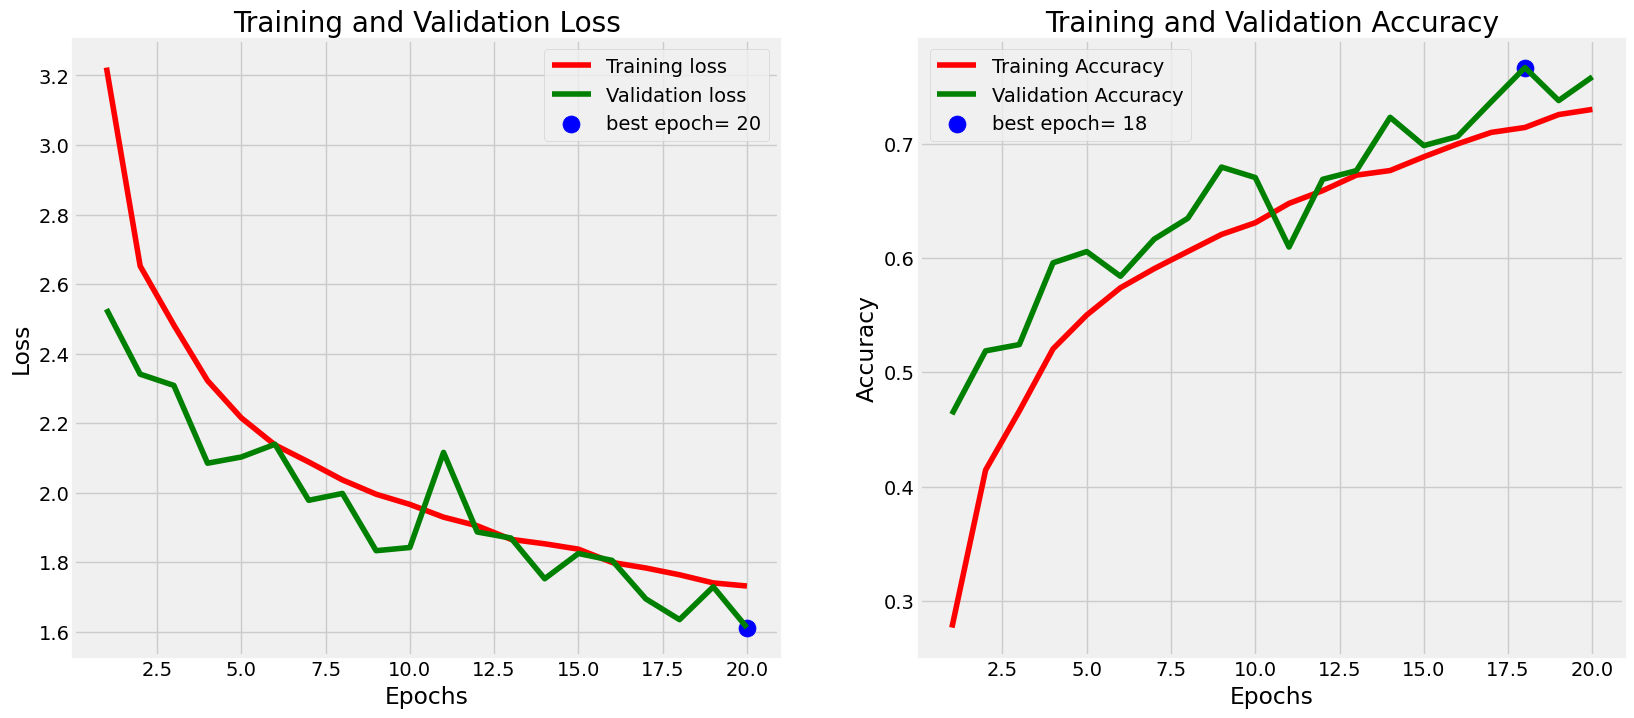

In [24]:
plot_training(history)

# Evaluation

## Evaluation using validation generator from dataset split

In [25]:
preds = model.predict(validation_generator, steps=5)
label = validation_generator.classes
pred = model.predict(validation_generator)

predicted_class_indices=np.argmax(pred,axis=1)

182/182 [==============================] - 21s 114ms/step


In [26]:
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]

## Confusion report

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cf_report = classification_report(predicted_class_indices,label)
cm = confusion_matrix(predicted_class_indices,label)

print(cf_report)

              precision    recall  f1-score   support

           0       0.77      0.59      0.67       258
           1       0.74      0.90      0.81       164
           2       0.65      0.81      0.72       161
           3       0.51      0.82      0.63       124
           4       0.92      0.88      0.90       208
           5       0.90      0.89      0.90       202
           6       0.55      0.71      0.62       154
           7       0.81      0.93      0.87       175
           8       0.93      1.00      0.96       186
           9       0.91      0.76      0.82       239
          10       0.48      0.67      0.56       145
          11       0.98      0.54      0.69       368
          12       0.95      0.77      0.85       247
          13       0.92      0.83      0.87       220
          14       0.57      0.81      0.67       141
          15       0.91      0.94      0.93       193
          16       0.49      0.70      0.58       142
          17       0.74    

## Confusion matrix

Text(0.5, 160.08333333333326, 'Predicted')

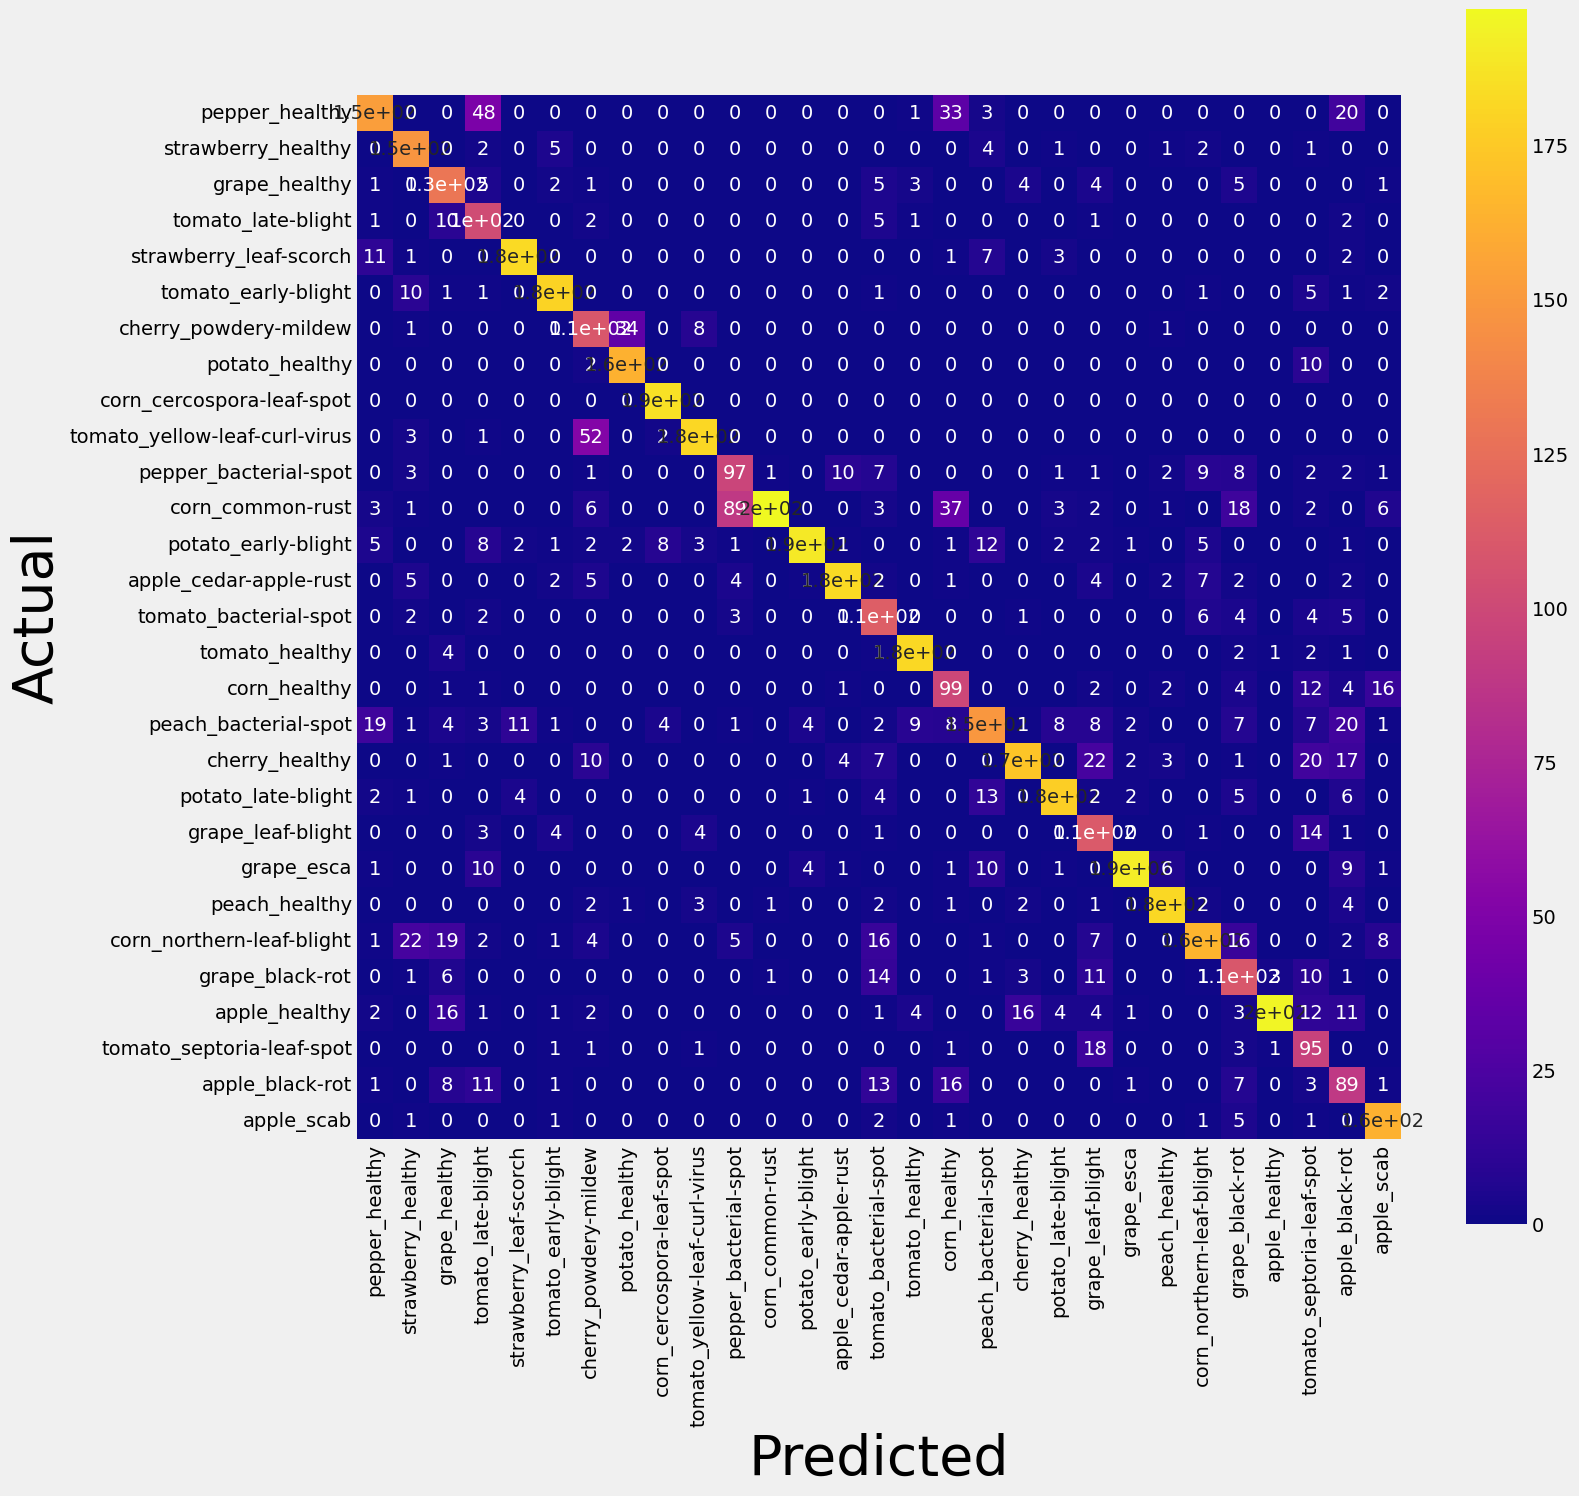

In [28]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(cm, cmap=plt.cm.plasma, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)

ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

## Image testing

In [ ]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (299, 299))
    img = img / 255.0  # Normalisasi nilai piksel
    return img


    return img
def predict(image):
    probabilities = model.predict(np.asarray([image]))[0]
    class_idx = np.argmax(probabilities)

    return {disease_types[class_idx]: probabilities[class_idx]}


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import os

def is_url(path_or_url):
    return path_or_url.startswith('http://') or path_or_url.startswith('https://')

def load_image(path_or_url):
    if is_url(path_or_url):
        # Download the image from the URL
        response = requests.get(path_or_url)
        img = np.array(Image.open(BytesIO(response.content)))
    else:
        # Load the image from a local file path
        img = cv2.imread(path_or_url)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    img = cv2.resize(img, (299, 299))
    img = img / 255.0  # Normalize pixel values
    return img

# Load a single image
img_path_or_url = 'https://raw.githubusercontent.com/WasiatD/MachineLearning/main/dataset/Image-test/TomatoHealthy1.JPG'
img = load_image(img_path_or_url)

# Predict the class of the image
prediction = predict(img)

# Print the prediction
print("Predicted class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))

# Show the image
plt.imshow(img)
plt.show()


# Converting to Tensorflow and TF-Lite

## Tensorflow

In [ ]:
from google.colab import files
path = "/content/model_fix"
tf.saved_model.save(model, path)

# Name for the ZIP file
zip_file_name = 'model-fix'

# Create a ZIP file
shutil.make_archive(zip_file_name, 'zip', path)

In [ ]:
from google.colab import files
files.download('/content/model-fix.zip') # save this mode then extract the zip file, the folder is for model in loaded_model

In [ ]:
class_names = [
    "Pepper__bell___Bacterial_spot", "Pepper__bell___healthy",
    "Strawberry___Leaf_scorch", "Strawberry___healthy",
    "Tomato_Bacterial_spot", "Tomato_Early_blight", "Tomato_Late_blight",
    "Tomato_Leaf_Mold", "Tomato_Septoria_leaf_spot",
    "Tomato_Spider_mites_Two_spotted_spider_mite", "Tomato__Target_Spot",
    "Tomato__Tomato_YellowLeaf__Curl_Virus", "Tomato__Tomato_mosaic_virus", "Tomato_healthy"
]


### How to use Tensorflow

In [ ]:
# Load the TensorFlow SavedModel
loaded_model = tf.saved_model.load(path)

In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np

# Function to check if the input is a URL
def is_url(path_or_url):
    return path_or_url.startswith('http://') or path_or_url.startswith('https://')

# Function to load image from a file path or URL
def load_image(path_or_url):
    if is_url(path_or_url):
        # Download the image from the URL
        response = requests.get(path_or_url)
        img = Image.open(BytesIO(response.content))
    else:
        # Load the image from a local file path
        img = Image.open(path_or_url)

    img = img.resize((299, 299))  # Resize the image to match model input size
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array.astype(np.float32) / 255.0  # Normalize pixel values and convert to float32
    return np.expand_dims(img_array, axis=0)  # Expand dimensions to match input shape of the model

img_path_or_url = 'https://raw.githubusercontent.com/WasiatD/MachineLearning/main/dataset/Image-test/TomatoYellowCurlVirus1.JPG'
img = load_image(img_path_or_url)

# Predict the class of the image using the loaded_model directly
prediction = loaded_model(img)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)
# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Display the predicted class name
print("Predicted class name:", predicted_class_name)


## TF-Lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

# Show model size in KBs.
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

In [ ]:
 # Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Show model size in KBs.
quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))


In [ ]:
f = open('plant_model.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

### How to use TF-lite

In [ ]:
tflite_model_path = "/content/plant_model.tflite"  # Ganti dengan path ke model TensorFlow Lite Anda
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()


In [ ]:
import requests
from urllib.parse import urlparse

# Check if the input is a URL or local file
img_url = '/content/TomatoEarlyBlight2.JPG'

# Function to check if a string is a valid URL
def is_url(string):
    parsed = urlparse(string)
    return all([parsed.scheme, parsed.netloc])

# Load image based on input type
if is_url(img_url):
    response = requests.get(img_url)
    image = tf.keras.preprocessing.image.load_img(BytesIO(response.content), target_size=(299, 299))
else:
    image = tf.keras.preprocessing.image.load_img(img_url, target_size=(299, 299))

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)
input_arr = input_arr / 255.0  # Normalisasi gambar input


In [ ]:
input_index = interpreter.get_input_details()[0]['index']
interpreter.set_tensor(input_index, input_arr)


In [ ]:
interpreter.invoke()


In [ ]:
output_index = interpreter.get_output_details()[0]['index']
output = interpreter.get_tensor(output_index)
predicted_class_index = np.argmax(output)
predicted_class_name = class_names[predicted_class_index]
print(predicted_class_index)
print("Predicted class:", predicted_class_name)

In [ ]:
from google.colab import files

# Tentukan path file yang ingin diunduh
file_path = "/content/plant_model.tflite"

# Unduh file
files.download(file_path)

# Generate information using GeminiAPI

### Upload model

In [ ]:
from google.colab import files

model_path = files.upload()

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
response = model.generate_content("Hello")
print(response.text)

## Implementation Tf-Lite model dan gemini

In [ ]:
def predict_image(model_path, image_path):
    # Load model
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Load image and preprocess
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(299, 299))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.expand_dims(input_arr, axis=0)
    input_arr = input_arr / 255.0  # Normalize the input image

    # Set input tensor
    input_index = interpreter.get_input_details()[0]['index']
    interpreter.set_tensor(input_index, input_arr)

    # Invoke interpreter
    interpreter.invoke()

    # Get output tensor and predicted class
    output_index = interpreter.get_output_details()[0]['index']
    output = interpreter.get_tensor(output_index)
    predicted_class_index = np.argmax(output)

    class_names = [
        "Pepper__bell___Bacterial_spot", "Pepper__bell___healthy",
        "Strawberry___Leaf_scorch", "Strawberry___healthy",
        "Tomato_Bacterial_spot", "Tomato_Early_blight", "Tomato_Late_blight",
        "Tomato_Leaf_Mold", "Tomato_Septoria_leaf_spot",
        "Tomato_Spider_mites_Two_spotted_spider_mite", "Tomato__Target_Spot",
        "Tomato__Tomato_YellowLeaf__Curl_Virus", "Tomato__Tomato_mosaic_virus",
        "Tomato_healthy"
    ]

    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

In [ ]:
def prompt_disease(disease):
    # Dapatkan kunci API Google Anda dari userdata
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

    # Konfigurasi kunci API
    genai.configure(api_key=GOOGLE_API_KEY)

    # Buat instance model GenerativeModel untuk Gemini
    model = genai.GenerativeModel('gemini-pro')

    # Prompt berdasarkan penyakit
    prompt = f"Jelaskan Penyakit {disease}: Pengertian, Penyebab, dan Cara Penanganan singkat dalam 3 paragraf."

    # Gunakan model untuk menghasilkan konten berdasarkan prompt
    response = model.generate_content(prompt)

    # Cetak hasil konten yang dihasilkan
    return response.text


In [ ]:
def main():
    model_path = "/content/plant_model.tflite"
    image_path = "/TomatoYellowCurlVirus1.JPG"
    predicted_class = predict_image(model_path, image_path)
    print(prompt_disease(predicted_class))

if __name__ == "__main__":
    main()


## Implementation Tensorflow model dan gemini

In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np

def predict_tf(img_path, loaded_model):
    class_names = [
        "Pepper__bell___Bacterial_spot", "Pepper__bell___healthy",
        "Strawberry___Leaf_scorch", "Strawberry___healthy",
        "Tomato_Bacterial_spot", "Tomato_Early_blight", "Tomato_Late_blight",
        "Tomato_Leaf_Mold", "Tomato_Septoria_leaf_spot",
        "Tomato_Spider_mites_Two_spotted_spider_mite", "Tomato__Target_Spot",
        "Tomato__Tomato_YellowLeaf__Curl_Virus", "Tomato__Tomato_mosaic_virus",
        "Tomato_healthy"
    ]

    # Load and preprocess the image
    img = Image.open(img_path)
    img = img.resize((299, 299))  # Resize the image to match model input size
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array.astype(np.float32) / 255.0  # Normalize pixel values and convert to float32

    # Predict the class of the image using the loaded_model directly
    prediction = loaded_model(np.expand_dims(img_array, axis=0))

    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name



In [ ]:
def main_tf():
    # Load the TensorFlow SavedModel
    loaded_model = tf.saved_model.load(model_path)

    # Load the image and predict the class
    predicted_class_name = predict_tf(image_path, loaded_model)

    # Print the predicted class name
    print(prompt_disease(predicted_class_name))

if __name__ == "__main__":
    model_path = "/content/model_fix"
    image_path = "/TomatoYellowCurlVirus1.JPG"
    main_tf()


# Closing

During this session, we successfully:

1.   Data Preparation: Cleaned and preprocessed our dataset, ensuring it was ready for effective model training.
2.   Model Training: Utilized the InceptionV3 model to harness transfer learning, achieving promising initial results.
3. Model Deployment: Discussed deploying our model using FastAPI and Cloud Run for scalability and accessibility.

To further improve your models:


1.   Experiment with Hyperparameters: Adjust hyperparameters to improve training and validation accuracy.
2.   Refine Prompts: Work on generating better prompts for more accurate and reliable outputs.


Thank you all. We've made significant strides in training machine learning models using TensorFlow and TFHub, leveraging the powerful InceptionV3 model for transfer learning.
